<a href="https://colab.research.google.com/github/cow-coding/ML-DL-Study/blob/master/DL%20from%20Scratch/Book%201/Chap04/3.Gradient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library Import

In [73]:
%cd /content/drive/MyDrive/Colab\ Notebooks/

import numpy as np
import matplotlib.pyplot as plt
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

/content/drive/MyDrive/Colab Notebooks


# Base function setting

In [74]:
def function_2(x):
  return np.sum(x**2)

# Gradient

이전에 구현한 편미분은 각각의 변수를 따로 관리하는 방식으로 구현했다.  
하지만 그렇게 구현하면 변수의 수만큼 함수를 만들어야한다.  
따라서 동시에 편미분을 하는 방법이 필요하다.  
이때 사용하는 방법이 벡터를 활용한 편미분 연산인데, 이를 **기울기(Gradient)**라고 한다.

## Numerical Gradient Implementation

In [75]:
def numerical_gradient_1d(f, x):
  h = 1e-4  # 0.0001
  grad = np.zeros_like(x) # x와 형상이 같은 배열 0으로 생성

  for idx in range(x.size):
    tmp_val = x[idx]  
    
    # f(x+h) 계산
    x[idx] = tmp_val + h
    fxh1 = f(x)

    # f(x-h) 계산
    x[idx] = tmp_val - h
    fxh2 = f(x)

    grad[idx] = (fxh1 - fxh2) / (2 * h)
    x[idx] = tmp_val  # 값 복원

  return grad

### Example Numerical Gradient

In [76]:
print(numerical_gradient_1d(function_2, np.array([3.0, 4.0])))
print(numerical_gradient_1d(function_2, np.array([0.0, 2.0])))
print(numerical_gradient_1d(function_2, np.array([3.0, 0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


# Gradient Method
- Gradient Descent
- Gradient Ascent

$$
x_{0} = x_{0} - \eta \frac{\partial{f}}{\partial{x_{0}}}
$$  

$$
x_{1} = x_{1} - \eta \frac{\partial{f}}{\partial{x_{1}}}
$$  

$\eta$ : 학습률(learning rate) - 갱신하는 양

일반적인 손실 함수는 매우 복잡핟. 따라서 매개변수 공간에서 어디가 최솟값인 공간인지 알기가 어렵다.  
이럴때 기울기를 이용해 찾는 것이 **경사법(Gradient Method), 경사하강법(Gradient Descent)**이다.  
여기서 주의할 점은 함수 값을 낮추는 방안을 제시하는 지표가 기울기라는 것이다.  
결과적으로 기울기가 가리키는 곳이 극소(local minimum)인지 최소(global minimum)인지 구분할 수 없다.

## Gradient Descent Implementation

In [77]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
  x = init_x
  x_history = [] # just graph making code

  for i in range(step_num):
    x_history.append(x.copy()) # just graph making code
    grad = numerical_gradient_1d(f, x)
    x -= lr * grad

  return x, np.array(x_history)

### Example of Gradient Descent

In [78]:
init_x = np.array([-3.0, 4.0])

x, x_history = gradient_descent(function_2, init_x, 0.1, 100)
print(x)

[-6.11110793e-10  8.14814391e-10]


### Change of calculation result by GD

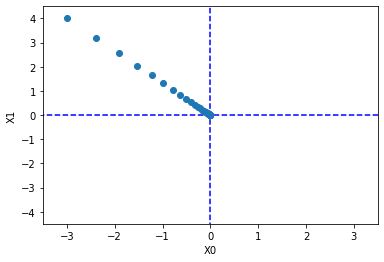

In [79]:
plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

### Bad Example of Learning rate

In [80]:
# Too high Learning rate : lr = 10.0
init_x = np.array([-3.0, 4.0])
lr10, _ = gradient_descent(function_2, init_x, 10.0, 100)
print(lr10)

# Too low Learning rate  : lr = 1e-10
init_x = np.array([-3.0, 4.0])
lr1e, _ = gradient_descent(function_2, init_x, 1e-10, 100)
print(lr1e)

[-2.58983747e+13 -1.29524862e+12]
[-2.99999994  3.99999992]


learning rate가 너무 큰 경우에는 값이 너무 큰 곳으로 발산해버린다.  
반대로 너무 작으면 값의 변화가 거의 변하지 못한다.

# Gradient in Neural Network

신경망 학습에서의 기울기를 구해보자.  
여기서의 기울기는 가중치 매개변수에 대한 손실 함수의 기울기이다.  


예를 들어 형상이 $2 \times 3$, 가중치가 W, 손실 함수가 L인 신경망을 생각해보자.  
경사의 식은 다음과 같다.  

$$
W = \begin{pmatrix}
w_{11} &w_{12} &w_{13} \\
w_{21} &w_{22} &w_{23}
\end{pmatrix}
$$  

$$
\frac{\partial{L}}{\partial{W}} =  \begin{pmatrix}
\frac{\partial{L}}{\partial{w_{11}}} &\frac{\partial{L}}{\partial{w_{12}}} &\frac{\partial{L}}{\partial{w_{13}}}\\
\frac{\partial{L}}{\partial{w_{21}}} &\frac{\partial{L}}{\partial{w_{22}}} &\frac{\partial{L}}{\partial{w_{23}}}
\end{pmatrix}
$$

## SimpleNet class

In [81]:
class simpleNet:
  def __init__(self):
    self.W = np.random.randn(2, 3)  # initialize for normal dist
  
  def predict(self, x):
    return np.dot(x, self.W)

  def loss(self, x, t):
    z = self.predict(x)
    y = softmax(z)
    loss = cross_entropy_error(y, t)

    return loss

### Example of SimpleNet

In [83]:
net = simpleNet()
print(net.W)  # weight parameter

x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

print(np.argmax(p)) # index of maximum

t = np.array([0, 0, 1]) # answer label
print(net.loss(x, t))

f = lambda w: net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.2262579  -0.34412829 -1.04104513]
 [-1.16493654  1.53880511  0.76192732]]
[-0.91268814  1.17844763  0.06110751]
1
1.4893828027586582
[[ 0.05109825  0.41359452 -0.46469278]
 [ 0.07664738  0.62039178 -0.69703916]]


만약 위에서 `numerical_gradient`를 구현한 것을 사용한다면 에러가 난다.  
이유는 해당 함수는 1차원 배열의 경우로만 동작한다.  
그래서 `common`에 있는 `numerical_gradient`를 가져와야한다.  